In [129]:
import json

# 'episode' : e,
#         'data' :{
#         "final_state": state.tolist(),
#         "reward_trajectory": reward_trajectory.tolist(),
#         "accumulative_reward": reward_trajectory.sum(),
#         "final_f1_score": current_f1
#         }

mem_file1 = 'exp1/Lai_exp/sep_agent_reward.json'
mem_file2 = 'exp1/Suguro/sep_agent_reward.json'
mem_file3 = 'exp1/Sugiyama/sep_agent_reward.json'
mem_file4 = 'sep_agent_reward.json'

def get(file):
    info = []
    with open(file) as f:
        contents = json.load(f)
        for content in contents:
            info.append(content)
    return info

lyf = get(mem_file1)
sgr = get(mem_file2)
sgym = get(mem_file3)
tkh = get(mem_file4)

with open('t.txt', 'w+') as f:
    i = 1
    for l, sg, sy, t in zip(lyf, sgm, sgr, tkh):
        d = '{:3d},{:8.3f},{:8.3f},{:8.3f},{:8.3f}\n'.format(
            i,
            l['data']["accumulative_reward"], 
            sg['data']["accumulative_reward"],
            sy['data']["accumulative_reward"], 
            t['data']["accumulative_reward"])
        f.write(d)
        i += 1    

In [52]:
tar = 34
s = 6
t = np.arange(0,100)

t[s - 1:tar] 

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


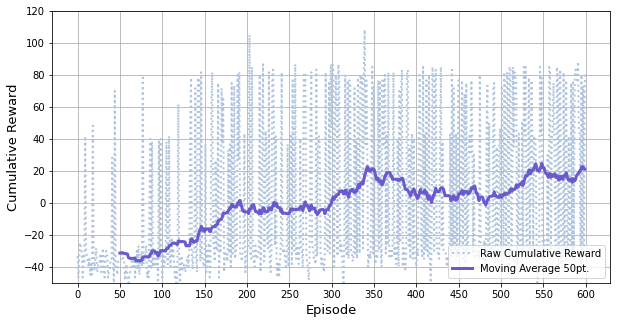

In [7]:
data  = np.array([])
subjs = [sgr, sgym, lyf, tkh]

for entry in lyf:
    data = np.append(data ,entry['data']["accumulative_reward"])
    
mv = 50
mv_avg = np.array([])
for i in range(1, len(data) - mv + 1):
    mv_avg = np.append(mv_avg, data[i - 1:i + mv].sum()/mv)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(data, c = 'lightsteelblue' ,linewidth = 2, linestyle= ':', label='Raw Cumulative Reward')
plt.plot(np.arange(mv, len(data)),mv_avg, linewidth = 3, c = 'slateblue', label = 'Moving Average {}pt.'.format(mv))
plt.ylim([-50, 120])
plt.xticks(np.arange(0, 600 + 1, mv))
plt.grid()
plt.xlabel('Episode', fontsize = 13)
plt.ylabel('Cumulative Reward', fontsize = 13)
plt.legend(loc = 'lower right')
plt.show()


In [44]:
#count number of target reached and channel combination
import numpy as np
maps =  {0:'F4',
 1: 'C4',
 2: 'P4',
 3: 'Cz',
 4: 'F3',
 5: 'C3',
 6: 'P3',
 7: 'F7',
 8: 'T3',
 9: 'T5',
 10: 'Fp1',
 11: 'Fp2',
 12: 'T4',
 13: 'F8',
 14: 'Fz',
 15: 'Pz',
 16: 'T6',
 17: 'O2',
 18: 'O1'}

rand = {"channel_reached":{},"nbr_target_reach":0}
sep = {"channel_reached":{},"nbr_target_reach":0}

for r, s in zip(randmem_traj, sepmem_traj):
    if r['data']["accumulative_reward"] > 0:
        loc = np.where(np.array(r['data']['final_state']) == 1)[0]
        chset = '-'.join([maps[n] for n in loc])
        
        if chset not in rand['channel_reached'].keys():
            rand['channel_reached'][chset] = 1
        else:
            rand['channel_reached'][chset] += 1
        
    if s['data']["accumulative_reward"] > 0:
        loc = np.where(np.array(s['data']['final_state']) == 1)[0]
        chset = '-'.join([maps[n] for n in loc])
        
        if chset not in rand['channel_reached'].keys():
            sep['channel_reached'][chset] = 1
        else:
            sep['channel_reached'][chset] += 1

        sep['nbr_target_reach'] += 1
    

print("------Channel found by Separate_Mem----")
for r in rand['channel_reached']:
    print(r,',',rand['channel_reached'][r])




------Channel found by Separate_Mem----
C4-P4-Cz-C3-T3-T5-Fp1-Fp2-T6-O2-O1 , 1
C4-P4-C3-F8-T6-O2-O1 , 1
F4-C4-P4-Cz-F3-C3-F7-Fp2-T4-Pz-T6-O1 , 1
C4-Cz-C3-F7-Fp2-T4-F8-T6-O2-O1 , 1
F4-C4-P4-Cz-C3-P3-Fp1-Fp2-F8-T6-O2-O1 , 1
F4-C4-Cz-F3-C3-T3-T5-Fp1-Fp2-T6-O2-O1 , 1
C4-P4-Cz-F3-C3-P3-T4-F8-T6-O2-O1 , 1
F4-C4-P4-Cz-C3-F7-T3-Fp1-T4-T6-O2-O1 , 1
C4-P4-C3-T3-Fp1-Fp2-Pz-T6-O1 , 1
C4-Cz-C3-T3-T4-Fz-T6-O1 , 1
C4-P4-Cz-C3-T3-Fp1-Fp2-Fz-T6-O1 , 1
F4-C4-Cz-F3-C3-T3-Fp2-T4-F8-T6-O1 , 1
C4-Cz-C3-T3-Fp2-T4-F8-T6-O1 , 15
C4-Cz-F3-C3-Fp2-T4-T6-O2-O1 , 2
F4-C4-Cz-C3-T3-Fp2-T4-T6-O1 , 1
C4-P4-Cz-C3-T3-Fp1-Fp2-T4-T6-O1 , 2
C4-P4-C3-T3-Fp1-Fp2-T4-T6-O1 , 1
C4-P4-Cz-C3-T3-Fp2-T4-F8-T6-O1 , 2
C4-Cz-F3-C3-T3-Fp2-T4-F8-T6-O1 , 1
C4-Cz-C3-F7-T3-Fp2-T4-F8-T6-O1 , 1
C4-Cz-C3-T3-Fp2-T4-T6-O1 , 10
F4-C4-Cz-C3-T3-Fp2-T4-F8-Fz-T6-O1 , 1
F4-C4-Cz-C3-T3-Fp2-F8-Fz-Pz-T6-O1 , 1
C4-Cz-C3-T3-Fp2-T4-F8-Fz-T6-O1 , 1
C4-Cz-F3-C3-T3-Fp2-T4-F8-T6-O2-O1 , 1
C4-P4-Cz-C3-T3-Fp2-T4-F8-T6-O2-O1 , 1
C4-Cz-C3-P3-T3-Fp2-T4-F8-T6-O2-O1 ,

In [2]:
import numpy as np
maps =  {0:'F4',
 1: 'C4',
 2: 'P4',
 3: 'Cz',
 4: 'F3',
 5: 'C3',
 6: 'P3',
 7: 'F7',
 8: 'T3',
 9: 'T5',
 10: 'Fp1',
 11: 'Fp2',
 12: 'T4',
 13: 'F8',
 14: 'Fz',
 15: 'Pz',
 16: 'T6',
 17: 'O2',
 18: 'O1'}
t = np.array([0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

chset = '-'.join([maps[n] for n in np.where(t == 1)[0]])
print(chset)


C4-P4


In [3]:
import json
import numpy as np
mem_file1 = 'exp1/Lai_exp/sep_agent_reward.json'
mem_file2 = 'exp1/Suguro/sep_agent_reward.json'
mem_file3 = 'exp1/Sugiyama/sep_agent_reward.json'
mem_file4 = 'exp1/Takahashi/sep_agent_reward.json'

def get(file):
    info = []
    with open(file) as f:
        contents = json.load(f)
        for content in contents:
            info.append(content)
    return info

lyf = get(mem_file1)
sgr = get(mem_file2)
sgym = get(mem_file3)
tkh = get(mem_file4)




def get_result_info(memory):
    info = {}
    state_count = np.zeros((1,19))
    for i in range(499, 600):
        t = {"channel_set_reached":None, 'final_acc':None}
        state_count += memory[i]['data']['final_state']
        if memory[i]['data']["accumulative_reward"] > 0:
            loc = np.where(np.array(memory[i]['data']['final_state']) == 1)[0]
            chset = '-'.join([maps[n] for n in loc])
            # t['channel_set_reached'] = chset
            # t['final_acc'] = memory[i]['data']['final_f1_score']
            if chset not in info.keys():
                info[chset] = {}
                info[chset]['acc'] = memory[i]['data']['final_f1_score']
                info[chset]['count'] = 1
            else:
                info[chset]['count'] += 1
            
    return info, state_count

d,s = get_result_info(lyf)


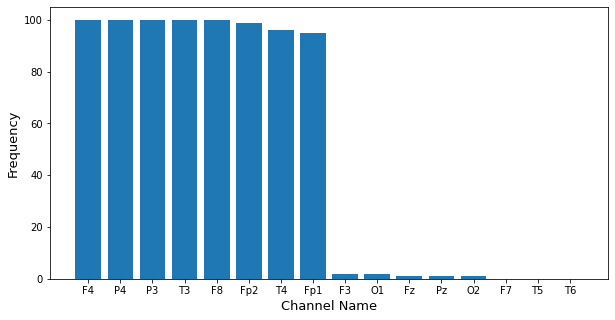

[100. 100.   2. 100.   0. 100.   0.  95.  99.  96. 100.   1.   1.   0.
   1.   2. 100.  93.   1.]


In [44]:
def plot_channel_dist(data, plots = True):
    state  = np.zeros((19,))
    for i in data[500:600]:
        i = np.array(i['data']['final_state'])
        state += i

    lb = {v:k for k,v in maps.items()}
    target  =[0,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18]
    del lb['Cz'], lb['C4'], lb['C3']
    for k,v in zip(lb, state):
        lb[k] = v
    lb = dict(sorted(lb.items(), key=lambda item: item[1], reverse=True))
    # #remove C3 C4 Cz
    # target = [0,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18]
    plt.figure(figsize=(10,5))
    plt.bar(lb.keys(), lb.values())
    plt.xlabel('Channel Name', fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    plt.show()
    return state

t1 = plot_channel_dist(sgym)
print(t)